## Part 1: ##

The company Fränzi and Friends developed a 2nd-generation quick test at home for
SARS-Cov-2, which is pending regulatory agency’s review. The test has been shown to have a sensitivity of 99.5% and a specificity of 99.5%. Suppose that Fred uses the test by Fränzi and Friends and the test was positive. Assume that 5% of the population is in fact infected. Was is your guess about the probability that Fred is indeed infected?

In [1]:
# Answer to Part 1:

# Variables that are given:
prevalence = 5 # 5%
sensitivity = 99.5 # 99.5%
specificity = 99.5 # 99.5%

# Calculated probabilities:
P_infected = prevalence / 100
P_not_infected = 1 - prevalence / 100
P_positive_given_infected = sensitivity
P_positive_given_not_infected = 1 - specificity / 100 # False Positive Rate, NOT sensitivity
# specificity is the true negative rate

# Printed probabilities:
# print(f"P_infected: {P_infected}")
# print(f"P_not_infected: {P_not_infected}")
# print(f"P_positive_given_infected: {P_positive_given_infected}")
# print(f"P_positive_given_not_infected: {P_positive_given_not_infected:.4f}")

# Bayes Theorem:
P_infected_given_positive = (P_positive_given_infected * P_infected) / ((P_positive_given_infected * P_infected) + (P_positive_given_not_infected * P_not_infected))

print(f"\nProbability that Fred is indeed infected given positive test: {P_infected_given_positive:.4f}")



Probability that Fred is indeed infected given positive test: 0.9990


## Part 2: ##

Please share a piece of code that visualizes the probability that Fred is indeed infected as the dependent variable, with the infection prevalence (5% in the example above, which takes any real-number value between 0.001% to 50%) and the specificity (99% in the example above, which takes values 99%, 99.9%,99.99%, and 99.999%) as independent variables. For simplicity, we fix the sensitivity at 99%. Visualize the results if possible, and use integers to check and explain your results. Use any programming language that you prefer.

Please put your code in GitHub or GitLab or other code-hosting service and paste the link below.

0.99
[0.99    0.999   0.9999  0.99999]


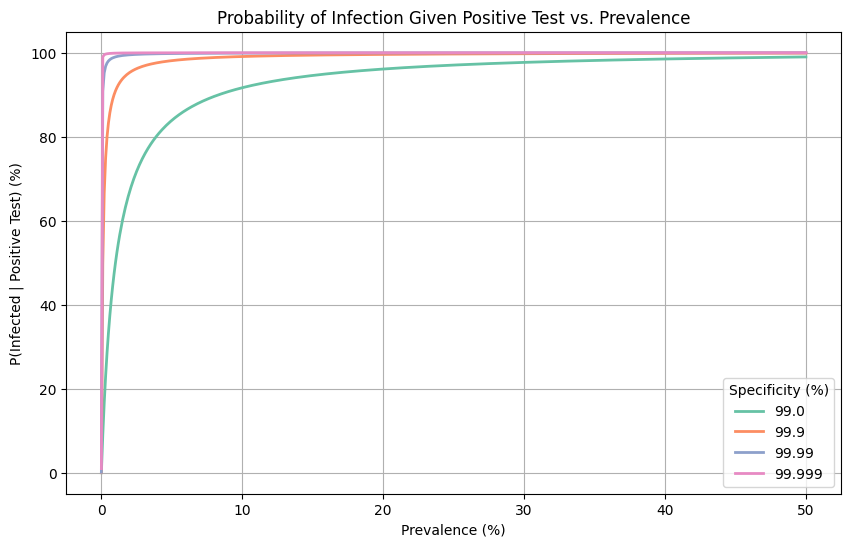

In [2]:
# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install seaborn


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the independent variables
prevalence_range = np.linspace(0.00001, 50, 500)  # Infection prevalence (0.001% to 50%)
specificity_values = [99, 99.9, 99.99, 99.999]  # Specificity is the true negative rate
sensitivity_fixed = 99  # Sensitivity fixed at 99%

# Convert to probabilities
sensitivity_fixed /= 100
print(sensitivity_fixed)
specificity_values = np.array(specificity_values) / 100
print(specificity_values)

# Initialize DataFrame to store results
results = []

# Compute P(Infected | Positive Test) for each prevalence value and specificity
for specificity in specificity_values:
    P_positive_given_not_infected = 1 - specificity  # False Positive Rate

    for prevalence in prevalence_range:
        P_infected = prevalence / 100
        P_not_infected = 1 - P_infected

        P_positive_given_infected = sensitivity_fixed

        P_infected_given_positive = (P_positive_given_infected * P_infected) / (
            (P_positive_given_infected * P_infected) + (P_positive_given_not_infected * P_not_infected)
        )

        results.append([prevalence, specificity * 100, P_infected_given_positive * 100])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Prevalence (%)", "Specificity (%)", "P(Infected | Positive Test) (%)"])

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_results,
    x="Prevalence (%)",
    y="P(Infected | Positive Test) (%)",
    hue="Specificity (%)",
    palette="Set2",
    linewidth=2
)
plt.title("Probability of Infection Given Positive Test vs. Prevalence")
plt.xlabel("Prevalence (%)")
plt.ylabel("P(Infected | Positive Test) (%)")
plt.legend(title="Specificity (%)")
plt.grid(True)
plt.show()


In [3]:
# Using Integers to verify

population = 100000
prevalence = 0.05 # 5% of the population is infected
sensitivity = 0.99  # True positive rate
specificity = 0.99  # True negative rate

# Compute the number of infected (I) and healthy (H) individuals
infected = int(prevalence * population)  # True number of infected people
healthy = population - infected  # True number of healthy people

# Compute test results
true_positives = int(sensitivity * infected)  # Correctly identified as infected
false_negatives = infected - true_positives  # Infected but test negative
true_negatives = int(specificity * healthy)  # Correctly identified as healthy
false_positives = healthy - true_negatives  # Healthy but test positive

# Compute total positives and negatives
total_positives = true_positives + false_positives  # Total positive test results
total_negatives = true_negatives + false_negatives  # Total negative test results



# Create confusion matrix as a DataFrame
confusion_matrix = pd.DataFrame(
    [[true_positives, false_negatives, total_positives],  # Row for Positive Tests (P)
     [false_positives, true_negatives, total_negatives],  # Row for Negative Tests (N)
     [infected, healthy, []]], # Row for total number of people
    columns=["Infected (I)", "Healthy (H)", "Total # of tests"],
    index=["Positive Tests (P)", "Negative Tests (N)", "Total # of people"]
)

# Display the confusion matrix
print(f"Sensitivity = {sensitivity*100}%")
print(f"Specificity = {specificity*100}%")
print(f"Prevalence = {prevalence*100}%")
print("\nConfusion Matrix for the above parameters:\n")
print(confusion_matrix)

Sensitivity = 99.0%
Specificity = 99.0%
Prevalence = 5.0%

Confusion Matrix for the above parameters:

                    Infected (I)  Healthy (H) Total # of tests
Positive Tests (P)          4950           50             5900
Negative Tests (N)           950        94050            94100
Total # of people           5000        95000               []
